In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fnm


from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier



plt.rcParams['font.family']='Malgun Gothic'



In [3]:
fd1=pd.read_excel('d:\\data2\\신한\\finance_data201903.xlsx')

In [4]:
fd2=pd.read_excel('d:\\data2\\신한\\finance_data201909.xlsx')

In [5]:
fd3=pd.read_excel('d:\\data2\\신한\\finance_data202003.xlsx')

In [6]:
fd4=pd.read_excel('d:\\data2\\신한\\finance_data202009.xlsx')

In [7]:
fd5=pd.read_excel('d:\\data2\\신한\\finance_data202103.xlsx')

In [8]:
df=pd.concat([fd1,fd2,fd3,fd4,fd5],axis=0)

In [9]:
df.head()

,기준년월,지역구,법정동코드,법정동,집계구코드,나이,성별,직장인여부,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액
0,201903,강남구,11680101,역삼동,1123064010001,2,1,0,0,0,0,2018319,2430312,0,0,0,0,0,0,0
1,201903,강남구,11680101,역삼동,1123064010001,2,2,0,0,0,0,2326837,2221251,0,0,0,0,0,0,0
2,201903,강남구,11680101,역삼동,1123064010001,3,1,0,0,0,0,1771639,1382057,1841250,0,0,0,0,0,0
3,201903,강남구,11680101,역삼동,1123064010001,3,2,0,0,0,0,1745601,2902578,3561440,0,0,0,0,0,0
4,201903,강남구,11680101,역삼동,1123064010001,4,1,0,0,0,0,1712433,1746992,8831666,0,0,0,0,0,0


## 결측치 확인

In [10]:
df.isnull().sum()

기준년월        0
지역구         0
법정동코드       0
법정동         0
집계구코드       0
나이          0
성별          0
직장인여부       0
급여입금        0
가맹점매출입금     0
연금입금        0
총소비금액       0
총수신금액       0
예적금금액       0
신탁금액        0
수익증권금액      0
신용대출금액      0
담보대출금액      0
주택대출금액      0
전세자금대출금액    0
dtype: int64

## 명목형 변수 확인

In [11]:

df[df.columns[df.dtypes.map(lambda x: x=='object')]].describe().transpose()

,count,unique,top,freq
지역구,1039568,25,송파구,68405
법정동,1039568,451,신림동,27423


In [12]:
df1=df.drop(['법정동코드','집계구코드'],axis=1)

In [154]:
df1.head()

,기준년월,지역구,법정동,나이,성별,직장인여부,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액
0,201903,강남구,역삼동,2,1,0,0,0,0,2018319,2430312,0,0,0,0,0,0,0
1,201903,강남구,역삼동,2,2,0,0,0,0,2326837,2221251,0,0,0,0,0,0,0
2,201903,강남구,역삼동,3,1,0,0,0,0,1771639,1382057,1841250,0,0,0,0,0,0
3,201903,강남구,역삼동,3,2,0,0,0,0,1745601,2902578,3561440,0,0,0,0,0,0
4,201903,강남구,역삼동,4,1,0,0,0,0,1712433,1746992,8831666,0,0,0,0,0,0


MZ세대 구분 칼럼 추가

In [26]:
df2=df1.copy()

In [27]:
df2['MZ여부']=np.nan

In [28]:
df2['MZ여부']=df2.나이.apply(lambda x: 'MZ세대' if (x==2)|(x==3) else '기성세대') 

In [155]:
df2.head()

,기준년월,지역구,법정동,나이,성별,직장인여부,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,MZ여부
0,201903,강남구,역삼동,2,1,0,0,0,0,2018319,2430312,0,0,0,0,0,0,0,MZ세대
1,201903,강남구,역삼동,2,2,0,0,0,0,2326837,2221251,0,0,0,0,0,0,0,MZ세대
2,201903,강남구,역삼동,3,1,0,0,0,0,1771639,1382057,1841250,0,0,0,0,0,0,MZ세대
3,201903,강남구,역삼동,3,2,0,0,0,0,1745601,2902578,3561440,0,0,0,0,0,0,MZ세대
4,201903,강남구,역삼동,4,1,0,0,0,0,1712433,1746992,8831666,0,0,0,0,0,0,기성세대


In [34]:
a=df2.groupby(['MZ여부'],as_index=False)['나이'].count()
a.columns=['세대','건수']

In [33]:
a

,세대,숫자
0,MZ세대,359432
1,기성세대,680136


# 가계 수입 부분

1. 급여임금
2. 가맹점 매출입금
3. 연금입금
/컫



In [60]:
gp_s=df2.groupby(['기준년월','MZ여부'],as_index=False)[['급여입금','가맹점매출입금','연금입금']].sum()
gp_s

,기준년월,MZ여부,급여입금,가맹점매출입금,연금입금
0,201903,MZ세대,11361255501,27714521,849522
1,201903,기성세대,9444576435,811813661,3467577333
2,201909,MZ세대,12869169588,26285008,1298152
3,201909,기성세대,11160845863,591589123,3670132355
4,202003,MZ세대,13138373211,21849388,1063292
5,202003,기성세대,12872347530,333253709,4261262966
6,202009,MZ세대,14986629650,10129696,1309636
7,202009,기성세대,13543333724,348032026,4274013997
8,202103,MZ세대,14883973889,31937922,1878016
9,202103,기성세대,14864800514,514755152,4862969143


=> 가맹점 매출입금의 경우에는 MZ세대와 기성세대간 큰 격차가 존재했는데, 이는 자영업자의 수가 기성세대가 더 많기 때문이라고 볼 수도 있으나
가맹점 매출입금 컬럼이 자영업자의 총 소득으로 볼 수 없기 때문에 (은행을 여러 곳을 사용하는 경우도 있음) 이를 단정지을 수 없다.



=> 연금입금의 경우에는 대부분의 경우가 고령층 연금수령에 해당하기 때문에 큰 격차가 있는 것으로 보인다. 

=> 기준년월을 기준으로 MZ세대와 기성세대를 그룹핑 했을때 MZ세대의 급여가 조금 더 높게 나타났다. 


In [67]:
y0=gp_s.loc[gp_s['MZ여부']=='MZ세대','급여입금']
y1=gp_s.loc[gp_s['MZ여부']=='기성세대','급여입금']

print('---MZ세대---')
print(y0)
print(' ')
print('---기성세대---')
print(y1)


---MZ세대---
0    11361255501
2    12869169588
4    13138373211
6    14986629650
8    14883973889
Name: 급여입금, dtype: int64
 
---기성세대---
1     9444576435
3    11160845863
5    12872347530
7    13543333724
9    14864800514
Name: 급여입금, dtype: int64


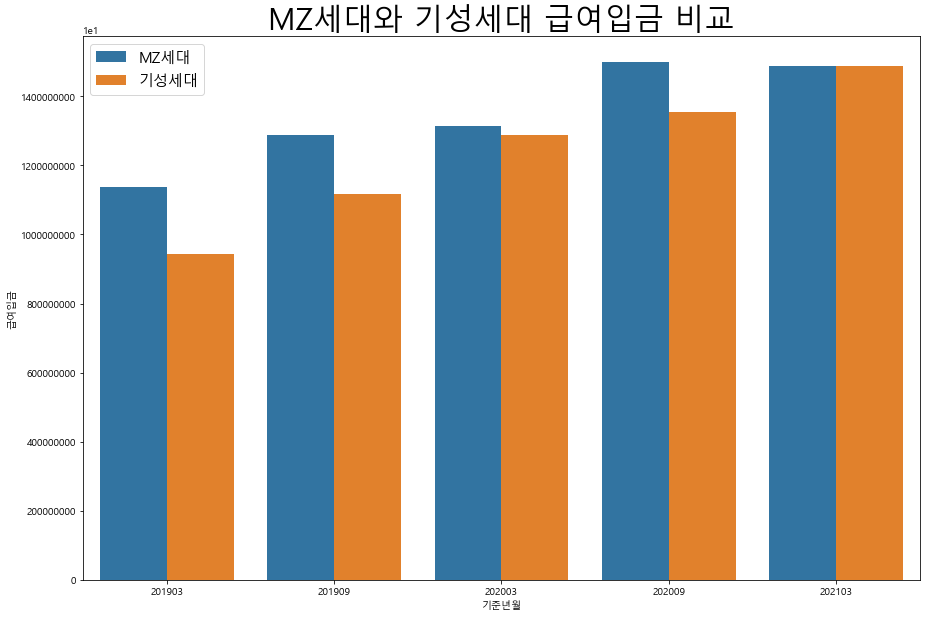

In [97]:
fig=plt.figure(figsize=(15,10))
sns.barplot(x='기준년월',y='급여입금',hue='MZ여부',data=gp_s)
plt.title('MZ세대와 기성세대 급여입금 비교',fontsize=30)
plt.legend(fontsize=15)
plt.ticklabel_format(axis="y", style="sci", scilimits=(1,1))
plt.show()

In [156]:
gp_s2=df2.groupby(['기준년월','나이'],as_index=False)[['급여입금']].sum()
gp_s2.head()

,기준년월,나이,급여입금
0,201903,2,940575860
1,201903,3,10420679641
2,201903,4,6194852133
3,201903,5,3019753808
4,201903,6,203242607


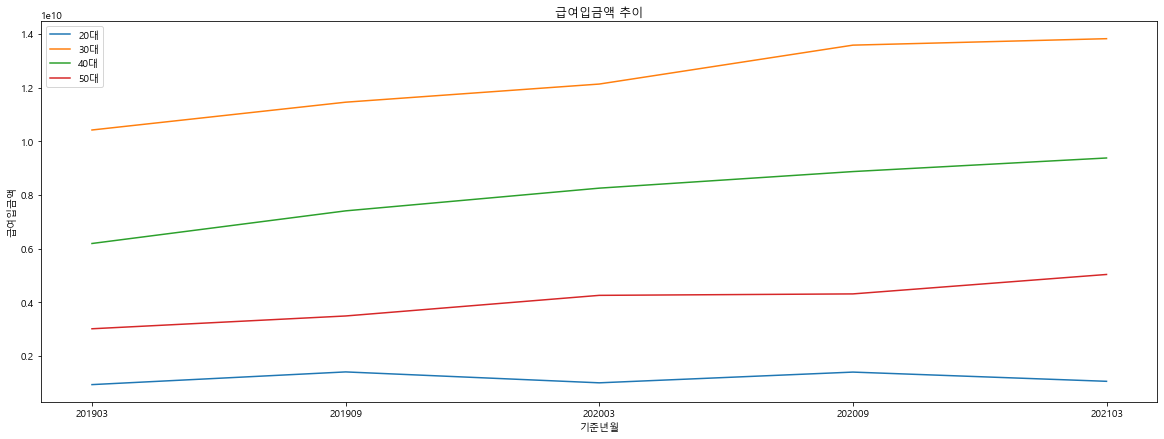

In [104]:
fig=plt.figure(figsize=(20,7))
fig.set_facecolor('white')
ax=fig.add_subplot()


y0=gp_s2.loc[gp_s2.나이==2,'급여입금']
y1=gp_s2.loc[gp_s2.나이==3,'급여입금']
y2=gp_s2.loc[gp_s2.나이==4,'급여입금']
y3=gp_s2.loc[gp_s2.나이==5,'급여입금']


x=np.arange(5)
xlab=gp['기준년월'].unique()

ax.plot(x,y0,label='20대')
ax.plot(x,y1,label='30대')
ax.plot(x,y2,label='40대')
ax.plot(x,y3,label='50대')

ax.legend()

plt.xticks(x,xlab)

plt.xlabel('기준년월')
plt.ylabel('급여입금액')
plt.title('급여입금액 추이')

plt.show()

=> 급여 입금액의 경우에는 MZ세대에서는 대부분 30대가 기성세대에서는 40,50대가 높은 비중을 차지했다.

시간의 흐름에 따른 변동 추이를 보면 30대 > 40대 > 50대 > 20대 순으로 급여입금액을 차지하고 있다.

20대의 경우에는 취업준비생, 대학생이 포함되어있고 비정규직 근로자(아르바이트,기간제 근로) 비중이 높고 상대적으로 다른 세대에 비해 이직 또는 퇴사율이 높기 때문에 상대적으로 다른 세대에 비해 불안정한 형태를 보이고 있다. 

30대의 경우 20년 3월 이후 급여입금액이 가장 많이 향상되었는데 이는 기업의 채용방식이 공채에서 수시채용으로 변경되면서 경력이 없는 20대보다는 경력이 있고 실무 능력이 있는 30대를 선호하면서 30대의 급여 및 취직률이 향상되었기 때문으로 해석할 수 있다.

40대와 50대는 꾸준히 안정적인 증가율을 보였는데 이는 20,30대에 비해 상대적으로 안정적인 직장을 보유하고 있기 때문으로 보인다. 또한 코로나로 인해 MZ세대의 급여가 정체되면서 2021년 3월에는 비슷한 수준의 급여입금액을 기록한 것으로 보인다.



# 가계 소비 부분

In [158]:
gp_d=df2.groupby(['기준년월','MZ여부'],as_index=False)[['총소비금액']].sum()
gp_d.head()

,기준년월,MZ여부,총소비금액
0,201903,MZ세대,79124865757
1,201903,기성세대,159047696824
2,201909,MZ세대,84941962717
3,201909,기성세대,173712206448
4,202003,MZ세대,73549364955


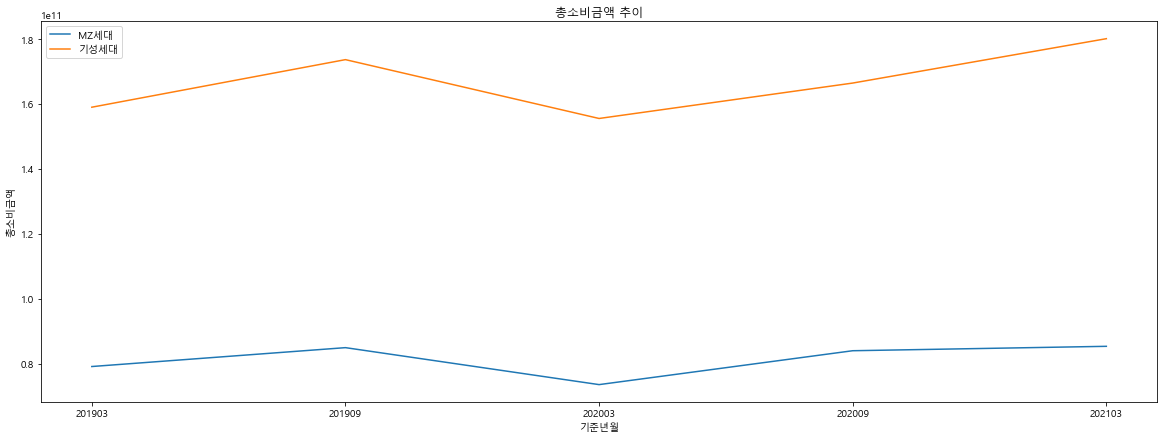

In [114]:
fig=plt.figure(figsize=(20,7))
fig.set_facecolor('white')
ax=fig.add_subplot()


y0=gp_d.loc[gp_d.MZ여부=='MZ세대','총소비금액']
y1=gp_d.loc[gp_d.MZ여부=='기성세대','총소비금액']



x=np.arange(5)
xlab=gp['기준년월'].unique()

ax.plot(x,y0,label='MZ세대')
ax.plot(x,y1,label='기성세대')


ax.legend()

plt.xticks(x,xlab)

plt.xlabel('기준년월')
plt.ylabel('총소비금액')
plt.title('총소비금액 추이')

plt.show()

In [118]:
df2.groupby(['나이'],as_index=False)[['총소비금액']].sum()

,나이,총소비금액
0,2,144785951489
1,3,262176188214
2,4,285731161351
3,5,268218215445
4,6,189180044059
5,7,91869469277


기성세대가 MZ세대보다 더 많은 총소비금액을 보이고 있다. 이는 30대 40대 50대가 비슷한 소비규모를 보이고 있다는 점에서 40,50대가 포함되어있는 기성세대가 2배 이상의 규모를 보인 것으로 보인다.
추세선을 보면 202003년에 동일하게 감소했다가 202009년 이후부터는 증가하는 추세를 보이고 있다. 이는 202003에 코로나의 본격화로 인해 소비심리 위축으로 인한 영향으로 보인다. 2020년 9월부터는 코로나가 본격적으로 장기화되면서 O2O서비스의 이용증가와 코로나의 영향으로 인한 보복소비 등으로 이러한 추세를 보이는 것으로 해석된다.

# 금융상품(투자)


In [135]:
gp_i=df2.groupby(['기준년월','MZ여부'],as_index=False)['총수신금액','예적금금액','신탁금액','수익증권금액'].sum()
gp_i

<ipython-input-135-56227174059b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gp_i=df2.groupby(['기준년월','MZ여부'],as_index=False)['총수신금액','예적금금액','신탁금액','수익증권금액'].sum()


,기준년월,MZ여부,총수신금액,예적금금액,신탁금액,수익증권금액
0,201903,MZ세대,208881712948,213571176793,3244782775,2423606508
1,201903,기성세대,611318789057,526888103227,109494853833,45819243804
2,201909,MZ세대,218529780691,219059629686,4183901994,2548394021
3,201909,기성세대,613277480387,500630883213,108461617242,47568711379
4,202003,MZ세대,229569227944,224832518885,4064004009,2216075893
5,202003,기성세대,658834930291,537568234856,115996679672,43465564606
6,202009,MZ세대,250575545448,234515699743,3837973059,2041146060
7,202009,기성세대,692692369959,526603581128,102128083068,44772516094
8,202103,MZ세대,247492786145,218563634306,3339214408,1407615533
9,202103,기성세대,710515830363,511890640018,97863813845,39707220698


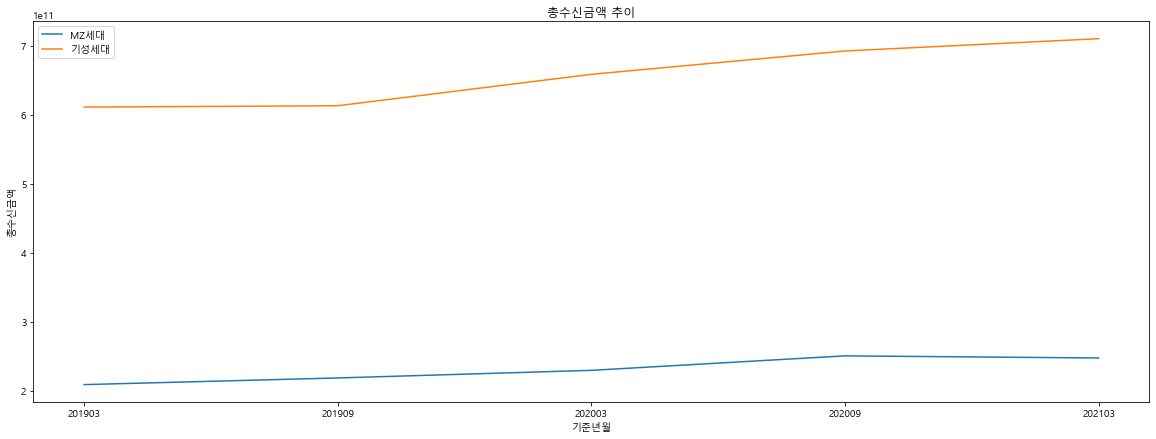

In [136]:
fig=plt.figure(figsize=(20,7))
fig.set_facecolor('white')
ax=fig.add_subplot()


y0=gp_i.loc[gp_i.MZ여부=='MZ세대','총수신금액']
y1=gp_i.loc[gp_i.MZ여부=='기성세대','총수신금액']



x=np.arange(5)
xlab=gp['기준년월'].unique()

ax.plot(x,y0,label='MZ세대')
ax.plot(x,y1,label='기성세대')


ax.legend()

plt.xticks(x,xlab)

plt.xlabel('기준년월')
plt.ylabel('총수신금액')
plt.title('총수신금액 추이')

plt.show()

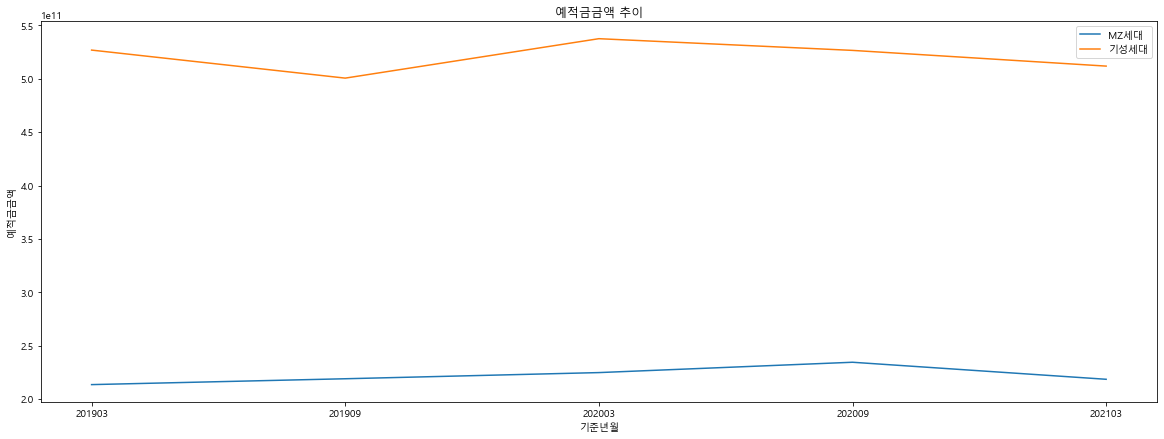

In [138]:
fig=plt.figure(figsize=(20,7))
fig.set_facecolor('white')
ax=fig.add_subplot()


y0=gp_i.loc[gp_i.MZ여부=='MZ세대','예적금금액']
y1=gp_i.loc[gp_i.MZ여부=='기성세대','예적금금액']



x=np.arange(5)
xlab=gp['기준년월'].unique()

ax.plot(x,y0,label='MZ세대')
ax.plot(x,y1,label='기성세대')


ax.legend()

plt.xticks(x,xlab)

plt.xlabel('기준년월')
plt.ylabel('예적금금액')
plt.title('예적금금액 추이')

plt.show()

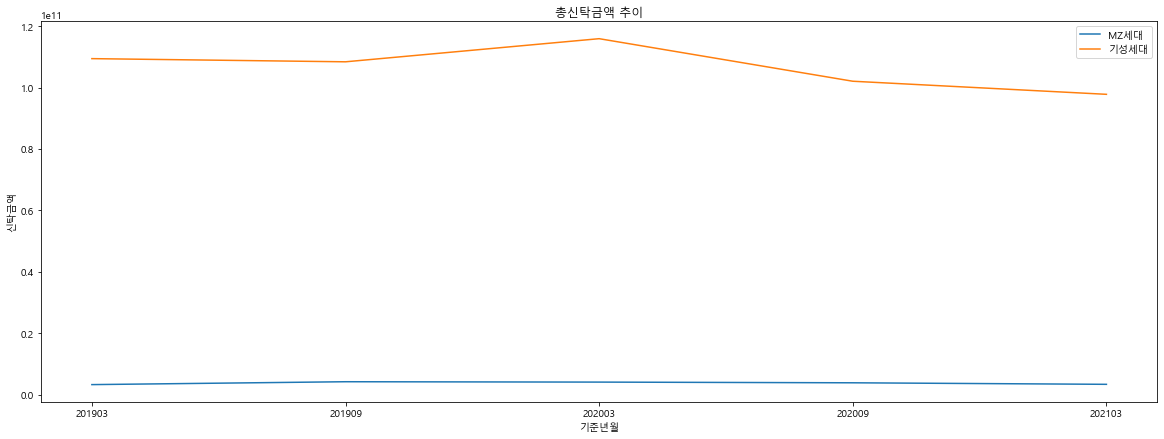

In [139]:
fig=plt.figure(figsize=(20,7))
fig.set_facecolor('white')
ax=fig.add_subplot()


y0=gp_i.loc[gp_i.MZ여부=='MZ세대','신탁금액']
y1=gp_i.loc[gp_i.MZ여부=='기성세대','신탁금액']



x=np.arange(5)
xlab=gp['기준년월'].unique()

ax.plot(x,y0,label='MZ세대')
ax.plot(x,y1,label='기성세대')


ax.legend()

plt.xticks(x,xlab)

plt.xlabel('기준년월')
plt.ylabel('신탁금액')
plt.title('총신탁금액 추이')

plt.show()

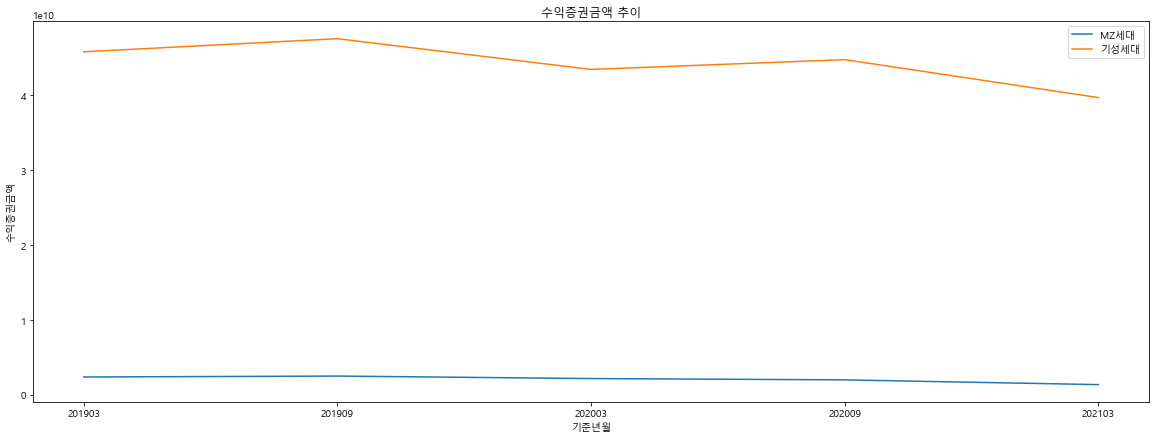

In [140]:
fig=plt.figure(figsize=(20,7))
fig.set_facecolor('white')
ax=fig.add_subplot()


y0=gp_i.loc[gp_i.MZ여부=='MZ세대','수익증권금액']
y1=gp_i.loc[gp_i.MZ여부=='기성세대','수익증권금액']



x=np.arange(5)
xlab=gp['기준년월'].unique()

ax.plot(x,y0,label='MZ세대')
ax.plot(x,y1,label='기성세대')


ax.legend()

plt.xticks(x,xlab)

plt.xlabel('기준년월')
plt.ylabel('수익증권금액')
plt.title('수익증권금액 추이')

plt.show()

# 금융상품(대출)


In [145]:
gp_l=df2.groupby(['기준년월','MZ여부'],as_index=False)['신용대출금액','담보대출금액','주택대출금액','전세자금대출금액'].sum()
gp_l

<ipython-input-145-e4b37c24d4f9>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gp_l=df2.groupby(['기준년월','MZ여부'],as_index=False)['신용대출금액','담보대출금액','주택대출금액','전세자금대출금액'].sum()


,기준년월,MZ여부,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액
0,201903,MZ세대,20870700851,93996910324,1219894302,27876760533
1,201903,기성세대,32355261274,265935052509,26004815513,3593229294
2,201909,MZ세대,26832188706,102561607264,1275273615,32643942689
3,201909,기성세대,36463433924,253705255769,22517448725,1964061714
4,202003,MZ세대,32916141109,131654981585,2127027136,53845325403
5,202003,기성세대,49094412174,253680169888,37056802575,1888657210
6,202009,MZ세대,46189339368,171945903045,2828895857,65484643574
7,202009,기성세대,56671286499,263090178164,33493140380,3954439374
8,202103,MZ세대,53325540462,214834722249,3399650442,86879543639
9,202103,기성세대,68621471761,290514846212,35719171011,6368433873


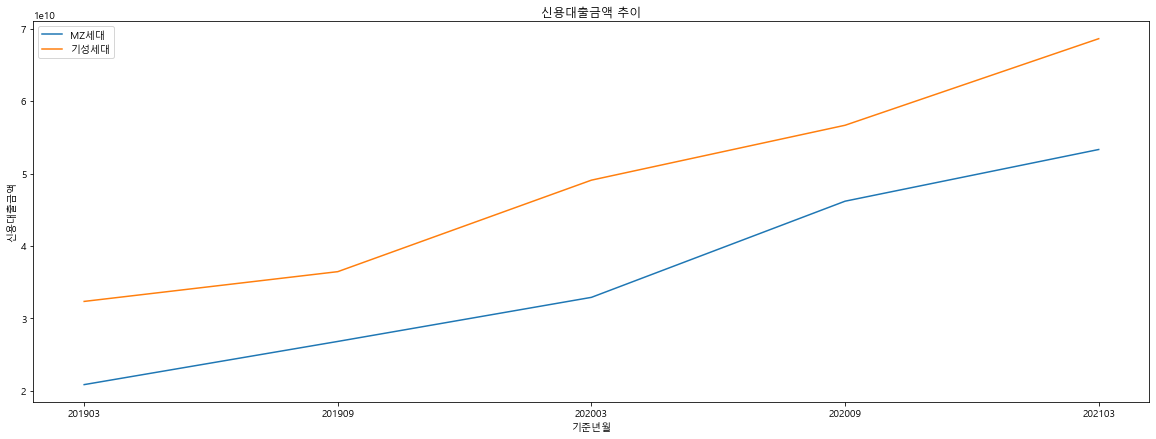

In [148]:
fig=plt.figure(figsize=(20,7))
fig.set_facecolor('white')
ax=fig.add_subplot()


y0=gp_l.loc[gp_l.MZ여부=='MZ세대','신용대출금액']
y1=gp_l.loc[gp_l.MZ여부=='기성세대','신용대출금액']



x=np.arange(5)
xlab=gp['기준년월'].unique()

ax.plot(x,y0,label='MZ세대')
ax.plot(x,y1,label='기성세대')


ax.legend()

plt.xticks(x,xlab)

plt.xlabel('기준년월')
plt.ylabel('신용대출금액')
plt.title('신용대출금액 추이')

plt.show()

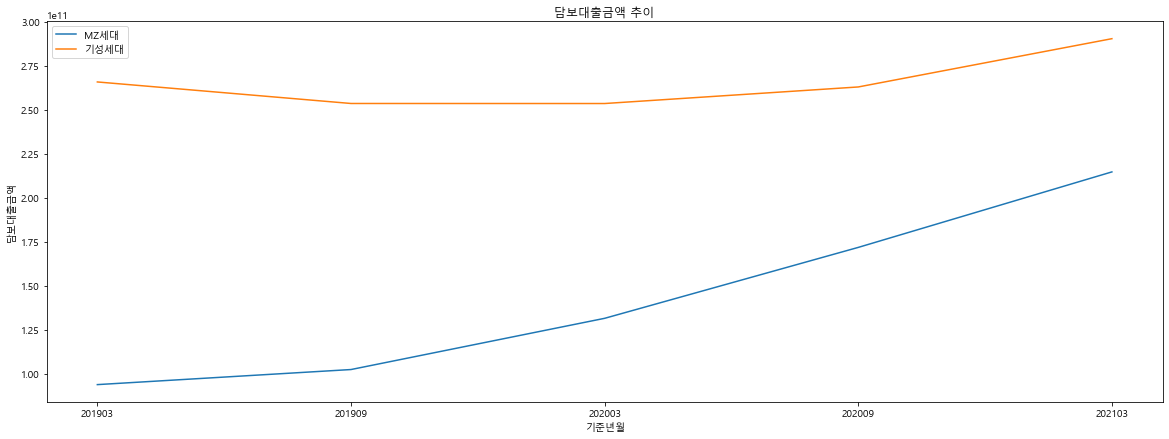

In [149]:
fig=plt.figure(figsize=(20,7))
fig.set_facecolor('white')
ax=fig.add_subplot()


y0=gp_l.loc[gp_l.MZ여부=='MZ세대','담보대출금액']
y1=gp_l.loc[gp_l.MZ여부=='기성세대','담보대출금액']



x=np.arange(5)
xlab=gp['기준년월'].unique()

ax.plot(x,y0,label='MZ세대')
ax.plot(x,y1,label='기성세대')


ax.legend()

plt.xticks(x,xlab)

plt.xlabel('기준년월')
plt.ylabel('담보대출금액')
plt.title('담보대출금액 추이')

plt.show()

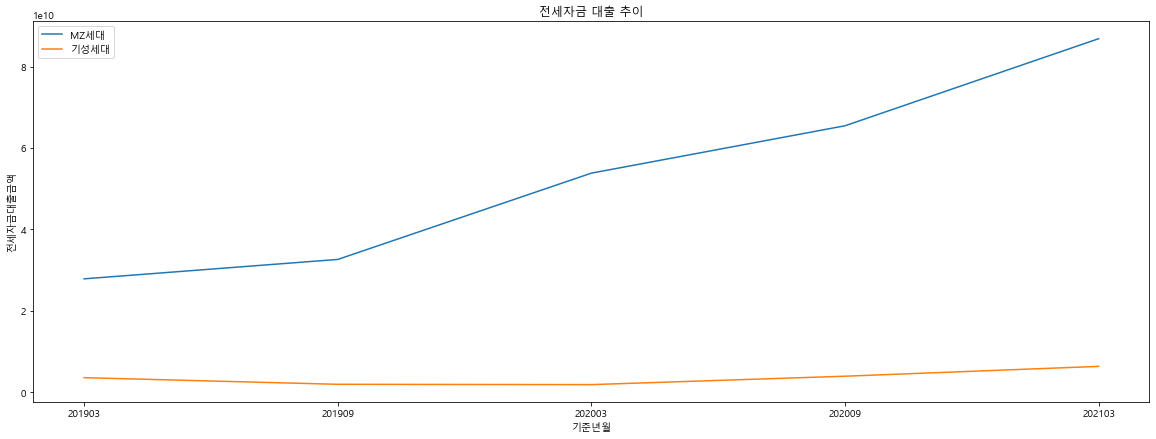

In [151]:
fig=plt.figure(figsize=(20,7))
fig.set_facecolor('white')
ax=fig.add_subplot()


y0=gp_l.loc[gp_l.MZ여부=='MZ세대','전세자금대출금액']
y1=gp_l.loc[gp_l.MZ여부=='기성세대','전세자금대출금액']



x=np.arange(5)
xlab=gp['기준년월'].unique()

ax.plot(x,y0,label='MZ세대')
ax.plot(x,y1,label='기성세대')


ax.legend()

plt.xticks(x,xlab)

plt.xlabel('기준년월')
plt.ylabel('전세자금대출금액')
plt.title('전세자금 대출 추이')

plt.show()

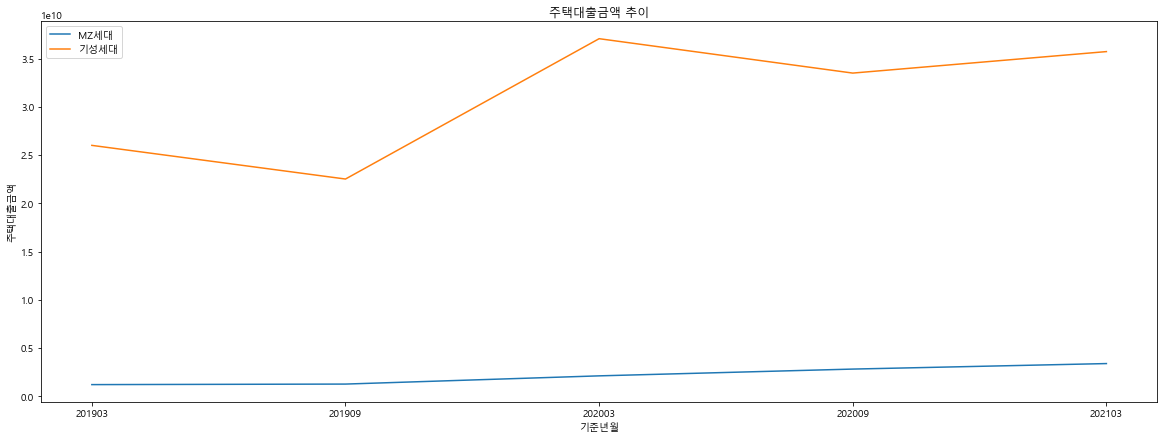

In [153]:
fig=plt.figure(figsize=(20,7))
fig.set_facecolor('white')
ax=fig.add_subplot()


y0=gp_l.loc[gp_l.MZ여부=='MZ세대','주택대출금액']
y1=gp_l.loc[gp_l.MZ여부=='기성세대','주택대출금액']



x=np.arange(5)
xlab=gp['기준년월'].unique()

ax.plot(x,y0,label='MZ세대')
ax.plot(x,y1,label='기성세대')


ax.legend()

plt.xticks(x,xlab)

plt.xlabel('기준년월')
plt.ylabel('주택대출금액')
plt.title('주택대출금액 추이')

plt.show()

대출상품과 관련된 MZ세대와 기성세대의 차이를 보면 전반적으로 양 세대 모두 규모의 차이가 있지만 대출의 비중이 늘어나고 있다.
이는 코로나 여파로 인한 저금리와 실직 등과 같은 가계의 재정적 부담이 가중되면서 발생한 것으로 보인다.

규모측면에서는 MZ세대는 전세자금대출이 기성세대는 주택대출금액에서 큰 차이를 보였는데 이는 상대적으로 안정적인 기성세대는 자가의 형태로 부동산을 소요하고있고 MZ세대는 전세 형식으로 집을 구하려 한다는 것을 알 수 있다. 

기성세대의 경우에는 일부 구간에서 대출이 감소하는 구간이 존재하지만 MZ세대의 경우는 지속적으로 증가하고 있다. 이는 MZ세대의 전세자금 대출뿐 아니라 대출을 통한 빛투, 영끌 등의 성향이 반영된 것으로 보인다.
